In [2]:
import erroranalysis as ea
import numpy as np
from scipy.constants import k as k_b
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os,sys,glob
import numpy as np
import pimcscripts.pimchelp as pimchelp
import pimcscripts.MCstat as MCstat
from collections import defaultdict
import argparse 
import subprocess
import pickle

#from joblib import Parallel, delayed
import multiprocessing
directory_paths = {
    r'$N_g = 0$': '../data/raw/qmc_OUTPUT/NONovember12/',
    r'$N_g = 1$': '../data/raw/qmc_OUTPUT/FirstNovember12/',
    r'$N_g = 2$': '../data/raw/qmc_OUTPUT/SECONDNovember12/',
    r'$N_g = 3$':'../data/raw/qmc_OUTPUT/THIRDNovember12/',
    r'$N_g = \infty$':'../data/raw/qmc_OUTPUT/FULLNovember12/'
}
for key, value in directory_paths.items():
    print(f"Key: {key}, Value: {value}")

Key: $N_g = 0$, Value: ../data/raw/qmc_OUTPUT/NONovember12/
Key: $N_g = 1$, Value: ../data/raw/qmc_OUTPUT/FirstNovember12/
Key: $N_g = 2$, Value: ../data/raw/qmc_OUTPUT/SECONDNovember12/
Key: $N_g = 3$, Value: ../data/raw/qmc_OUTPUT/THIRDNovember12/
Key: $N_g = \infty$, Value: ../data/raw/qmc_OUTPUT/FULLNovember12/


In [3]:
#%run ~/.local/bin/merge.py -u -100 /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/FULLSeptember3/
#directory_paths[r'$N_g = 0$']=value+'MERGED/'
print(directory_paths[r'$N_g = 0$'])

../data/raw/qmc_OUTPUT/NONovember12/


In [4]:
def compressibility(N,N2,volume=1.0,k_B=1.0,T=1.0):
    pf = 1/(volume*k_B*T)
    return pf*(((N2 - (N**2)))/1)
def heatcapacity(E,E2,k_B=1.0,T=1.0):
    pf = 1/(k_B*(T**2))
    return pf*(((E2 - (E**2))))

In [5]:
MERGED_files = True
if MERGED_files == False:
    folder_name = "MERGED"
    for key, value in directory_paths.items():
        directory = value
        if key == r'$N_g = 0$' or key == r'$N_g = \infty$':
            for i in range(-125, -14):
                %run ~/.local/bin/merge.py -u {i} {directory}
            #directory_paths[key]=value+'MERGED/'
    for key, value in directory_paths.items():
        directory = value
        if key == r'$N_g = 0$' or key == r'$N_g = \infty$':
            directory_paths[key]=value+'MERGED/'

In [6]:
for key, value in directory_paths.items():
    print(f"Key: {key}, Value: {value}")

Key: $N_g = 0$, Value: ../data/raw/qmc_OUTPUT/NONovember12/
Key: $N_g = 1$, Value: ../data/raw/qmc_OUTPUT/FirstNovember12/
Key: $N_g = 2$, Value: ../data/raw/qmc_OUTPUT/SECONDNovember12/
Key: $N_g = 3$, Value: ../data/raw/qmc_OUTPUT/THIRDNovember12/
Key: $N_g = \infty$, Value: ../data/raw/qmc_OUTPUT/FULLNovember12/


In [7]:
data={}
Analysis = False
pickle_file_path = '../data/data.pkl'

if Analysis == True:
    all_file_names = os.listdir('../data/QMC/NONovember12/MERGED/')
    gce_estimator_files = [f for f in all_file_names if f.startswith('gce-estimator-')]
    num = len(gce_estimator_files)-3
    box_volume = 14.757072880486835*17.04*10#\AA^3
    volume = box_volume
    temperature = 1 #K
    skip = 500
    for key, value in directory_paths.items():
        all_file_names = os.listdir(value)
        gce_estimator_files = [f for f in all_file_names if f.startswith('gce-estimator-')]
        gce_estimator_files = pimchelp.sortFileNames(gce_estimator_files)
        data[key] ={'u':np.zeros([num],float),'aveN':np.zeros([num],float),'errN':np.zeros([num],float),'aveKappa':np.zeros([num],float),'errKappa':np.zeros([num],float),'aveC':np.zeros([num],float),'errC':np.zeros([num],float)}
        for i in range(num):
            j=i+3
            headers = pimchelp.getHeadersFromFile(value+'/'+gce_estimator_files[j])
            param = pimchelp.getFileNameParameters(gce_estimator_files[j])
            chem = float(param[4])
            estData = np.loadtxt(value+'/'+gce_estimator_files[j],ndmin=2)
            N = estData[:,headers.index('N')]
            E = estData[:,headers.index('E')]
            boot = ea.bootstrap(N)
            data[key]['u'][i] = chem
            data[key]['aveN'][i] = boot[0]
            data[key]['errN'][i] = boot[1]
            κ_avg, κ_err = ea.bootstrap_on_function(compressibility,N[skip:],N[skip:]**2,volume=volume,k_B=1,T=temperature)
            data[key]['aveKappa'][i] = κ_avg
            data[key]['errKappa'][i] = κ_err
            C_avg, C_err = ea.bootstrap_on_function(heatcapacity,E,E**2,k_B=1,T=temperature)
            data[key]['aveC'][i] = C_avg
            data[key]['errC'][i] = C_err
            with open(pickle_file_path, 'wb') as file:
                pickle.dump(data, file)
with open(pickle_file_path, 'rb') as file:
    data = pickle.load(file)

In [8]:
print(data['$N_g = 0$']['u'][:])
print(data['$N_g = 0$']['aveN'][70:])

[-122. -121. -120. -119. -118. -117. -116. -115. -114. -113. -112. -111.
 -110. -109. -108. -107. -106. -105. -104. -103. -102. -101. -100.  -99.
  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.
  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.
  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.
  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.
  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.
  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.
  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.]
[27.99935286 25.         27.97432979 25.01052582 27.99729435 27.99991276
 28.         27.99993304 28.         25.         28.         28.
 28.         28.         28.00000011 28.00000451 28.00000711 28.00003928
 28.00010666 28.00019836 28.00062442 28.00164742 28.004697   28.01317845
 28.03310412 30.19753749 30.58826805 33.50540767 34.835981

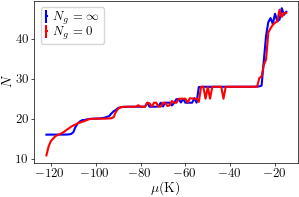

In [9]:
#plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(data[r'$N_g = \infty$']['u'],data[ r'$N_g = \infty$']['aveN'],yerr=data[ r'$N_g = \infty$']['errN'],color='blue',label=r'$N_g = \infty$')
#plt.errorbar(data[r'$N_g = 1$']['u'],data[ r'$N_g = 1$']['aveN'],yerr=data[ r'$N_g = 1$']['errN'],color='black',label=r'$N_g = 3$')
plt.errorbar(data[ r'$N_g = 0$']['u'],data[ r'$N_g = 0$']['aveN'],yerr=data[ r'$N_g = 0$']['errN'],color='red',label=r'$N_g = 0$')

plt.ylabel(r'$N$',fontsize=10)
plt.xlabel(r'$\mu$(K)',fontsize=10)
#plt.xlim(-40,-15)
#plt.ylim(25,50)
plt.legend(loc='upper left')
plt.show()

In [10]:
blue_color = (0, 0, 1)      # (R, G, B) = (0, 0, 1) for blue
black_color = (0, 0, 0)     # (R, G, B) = (0, 0, 0) for black

# Plot with error bars and custom RGB colors
plt.errorbar(data[r'$N_g = 0$']['u'], data[r'$N_g = 0$']['aveKappa'], yerr=data[r'$N_g = 0$']['errKappa'], color=blue_color, label=r'$N_g = 0$')
plt.errorbar(data[r'$N_g = \infty$']['u'], data[r'$N_g = \infty$']['aveKappa'], yerr=data[r'$N_g = \infty$']['errKappa'], color=black_color, label=r'$N_g = \infty$')
#plt.errorbar(data[ r'$N_g = 3$']['u'],data[ r'$N_g = 3$']['aveKappa'],yerr=data[ r'$N_g = 3$']['errKappa'],color='green')
#plt.errorbar(data[ r'$N_g = 2$']['u'],data[ r'$N_g = 2$']['aveKappa'],yerr=data[ r'$N_g = 2$']['errKappa'],color='black')
#plt.errorbar(data[ r'$N_g = 1$']['u'],data[ r'$N_g = 1$']['aveKappa'],yerr=data[ r'$N_g = 1$']['errKappa'],color='orange')
#plt.ylim(0,2e-6)
#plt.ylim(0,2.5e-6)
plt.xlim(-120,-30)
#plt.yscale('log')
plt.ylim(0,.001)
plt.ylabel(r'Compressibility $\kappa$ $(K^{-1}Å^{-3})$',fontsize=12)
plt.xlabel(r'$\mu$ (K)',fontsize=12)
plt.legend(loc='upper left')
#plt.savefig('../figures/Fig5.pdf', format='pdf')
plt.show()

RuntimeError: latex was not able to process the following string:
b'Compressibility $\\\\kappa$ $(K^{-1}\\u212b^{-3})$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpa4qyt7bq 639bf48de817984dcecebdb4bbf1b379.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 23.5) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(639bf48de817984dcecebdb4bbf1b379.tex
LaTeX2e <2023-06-01> patch level 1
L3 programming layer <2023-06-30>
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/siunitx\siunitx.sty
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/translations\translatio
ns.sty
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/etoolbox\etoolbox.sty)
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/generic/pdftexcmds\pdftexcmds
.sty
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/generic/infwarerr\infwarerr.s
ty)
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/generic/ltxcmds\ltxcmds.sty))
) (C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amstext.sty
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsgen.sty))
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/tools\array.sty))
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/svrsymbols\svrsymbols.s
ty)
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.s
ty) (C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/graphics\color.sty
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/graphics-cfg\color.cfg)
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/graphics-def\dvips.def)
 (C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/graphics\dvipsnam.def)
 (C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/graphics\mathcolor.ltx
))
(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file 639bf48de817984dcecebdb4bbf1b379.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

(C:\Users\evilb\AppData\Local\Programs\MiKTeX\tex/latex/translations/dicts\tran
slations-basic-dictionary-english.trsl)

! LaTeX Error: Unicode character Å (U+212B)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.30 ...amily Compressibility $\kappa$ $(K^{-1}Å
                                                  ^{-3})$}%
No pages of output.
Transcript written on C:\Users\evilb\.matplotlib\tex.cache\63\9b\tmpa4qyt7bq\63
9bf48de817984dcecebdb4bbf1b379.log.




<Figure size 340.39x210.373 with 1 Axes>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


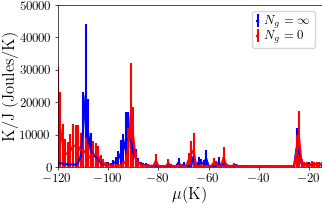

In [11]:
#plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(data[r'$N_g = \infty$']['u'],data[ r'$N_g = \infty$']['aveC'],yerr=data[ r'$N_g = \infty$']['aveC'],color='blue',label=r'$N_g = \infty$')
#plt.errorbar(data[ r'$N_g = 3$']['u'],data[ r'$N_g = 3$']['aveC'],yerr=data[ r'$N_g = 3$']['aveC'],color='green')
#plt.errorbar(data[ r'$N_g = 2$']['u'],data[ r'$N_g = 2$']['aveC'],yerr=data[ r'$N_g = 2$']['aveC'],color='black')
#plt.errorbar(data[ r'$N_g = 1$']['u'],data[ r'$N_g = 1$']['aveC'],yerr=data[ r'$N_g = 1$']['aveC'],color='orange')

plt.errorbar(data[ r'$N_g = 0$']['u'],data[ r'$N_g = 0$']['aveC'],yerr=data[ r'$N_g = 0$']['aveC'],color='red',label=r'$N_g = 0$')
plt.ylim(0,5e4)
plt.xlim(-120,-15)
plt.ylabel(r'K/J (Joules/K)',fontsize=12)
plt.xlabel(r'$\mu$(K)',fontsize=12)
plt.legend(loc='upper right')
plt.savefig('../figures/Fig8.eps', format='eps')

plt.show()

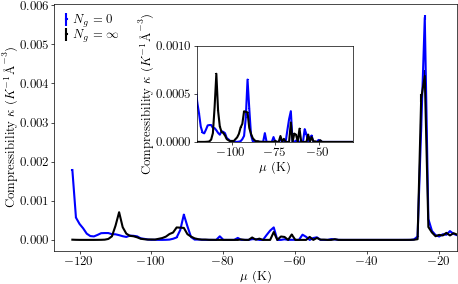

In [18]:
import matplotlib.pyplot as plt
plot_style = {'aps':'aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])

blue_color = (0, 0, 1)      
black_color = (0, 0, 0)

fig = plt.figure(figsize=(3.4646*1.5, 2.14122*1.5))
# Plot with error bars and custom RGB colors
plt.errorbar(data[r'$N_g = 0$']['u'], data[r'$N_g = 0$']['aveKappa'], yerr=data[r'$N_g = 0$']['errKappa'], color=blue_color, label=r'$N_g = 0$')
plt.errorbar(data[r'$N_g = \infty$']['u'], data[r'$N_g = \infty$']['aveKappa'], yerr=data[r'$N_g = \infty$']['errKappa'], color=black_color, label=r'$N_g = \infty$')
plt.xlim(-127, -15)
#plt.ylim(0, 0.001)
plt.ylabel(r'Compressibility $\kappa$ $(K^{-1}\textrm{\AA}^{-3})$')
plt.xlabel(r'$\mu$ (K)')
plt.legend(loc='upper left')

# Create the inset axes in the top right corner
axins = plt.axes([0.40, 0.45, 0.3, 0.3])  # (left, bottom, width, height)

# Plot the data in the inset
axins.errorbar(data[r'$N_g = 0$']['u'], data[r'$N_g = 0$']['aveKappa'], yerr=data[r'$N_g = 0$']['errKappa'], color=blue_color, label=r'$N_g = 0$')
axins.errorbar(data[r'$N_g = \infty$']['u'], data[r'$N_g = \infty$']['aveKappa'], yerr=data[r'$N_g = \infty$']['errKappa'], color=black_color, label=r'$N_g = \infty$')
axins.set_xlim(-120, -30)
axins.set_ylim(0, 0.001)

# Customize the inset appearance
axins.set_xlabel(r'$\mu$ (K)')
axins.set_ylabel(r'Compressibility $\kappa$ $(K^{-1}\textrm{\AA}^{-3})$')
plt.savefig('../figures/Fig4.svg', format='svg')
plt.savefig('../figures/Fig4.pdf', format='pdf')
